In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

file_path = r'D:\covid - 19\project-2_materials\covid19_Confirmed_dataset.csv'
df = pd.read_csv(file_path, encoding='ascii')

df_melted = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                    var_name='Date', 
                    value_name='Confirmed')

df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%m/%d/%y', errors='coerce')

df_melted = df_melted.sort_values('Date')

global_cases = df_melted.groupby('Date')['Confirmed'].sum().reset_index()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv(r'C:\Users\user\Downloads\Project2\covid19_deaths_dataset.csv', encoding='ascii')

# Clean up the data
df = df.dropna(subset=['Country/Region'])  # Remove rows with NaN in Country/Region
df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
             var_name='Date', value_name='Deaths')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['Deaths'] = df['Deaths'].astype(int)

# Group by country and date, sum deaths
df_grouped = df.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

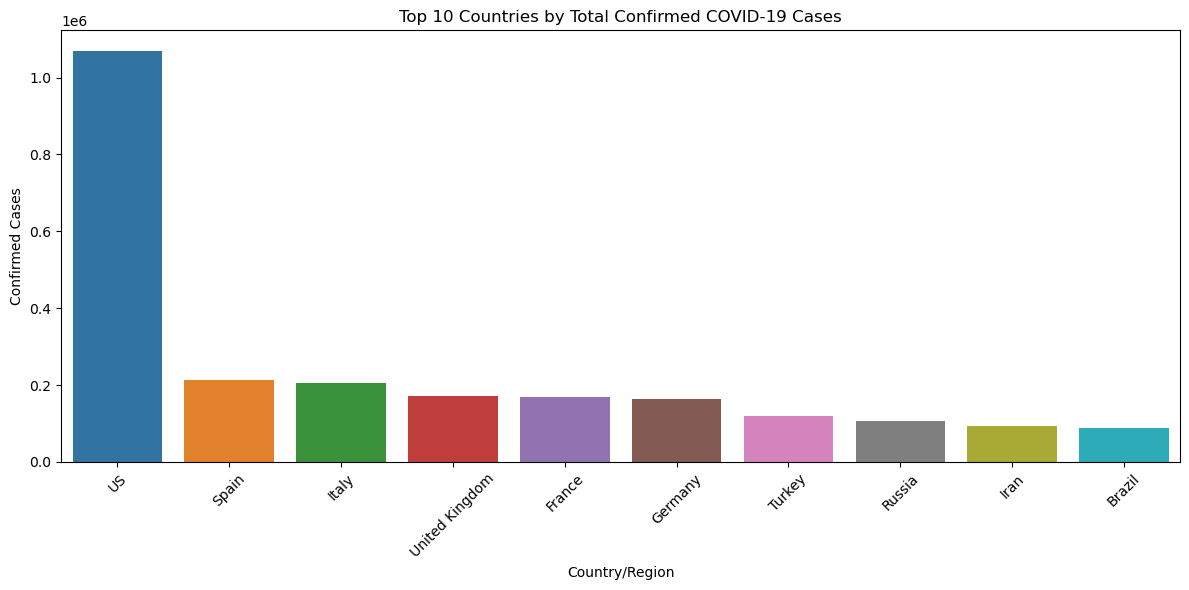

Global Confirmed Cases as of 2020-04-30 : 3256846
Top 5 Countries by Confirmed Cases:
Country/Region
US                1069424
Spain              213435
Italy              205463
United Kingdom     171253
France             167605


<Figure size 640x480 with 0 Axes>

In [6]:
# Top 10 countries by total confirmed cases
top_countries = df_melted.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('Top 10 Countries by Total Confirmed COVID-19 Cases.png', dpi=300, bbox_inches='tight')

print("Global Confirmed Cases as of", global_cases['Date'].max().strftime('%Y-%m-%d'), ":", global_cases['Confirmed'].max())
print("\
Top 5 Countries by Confirmed Cases:")
print(top_countries.head().to_string())

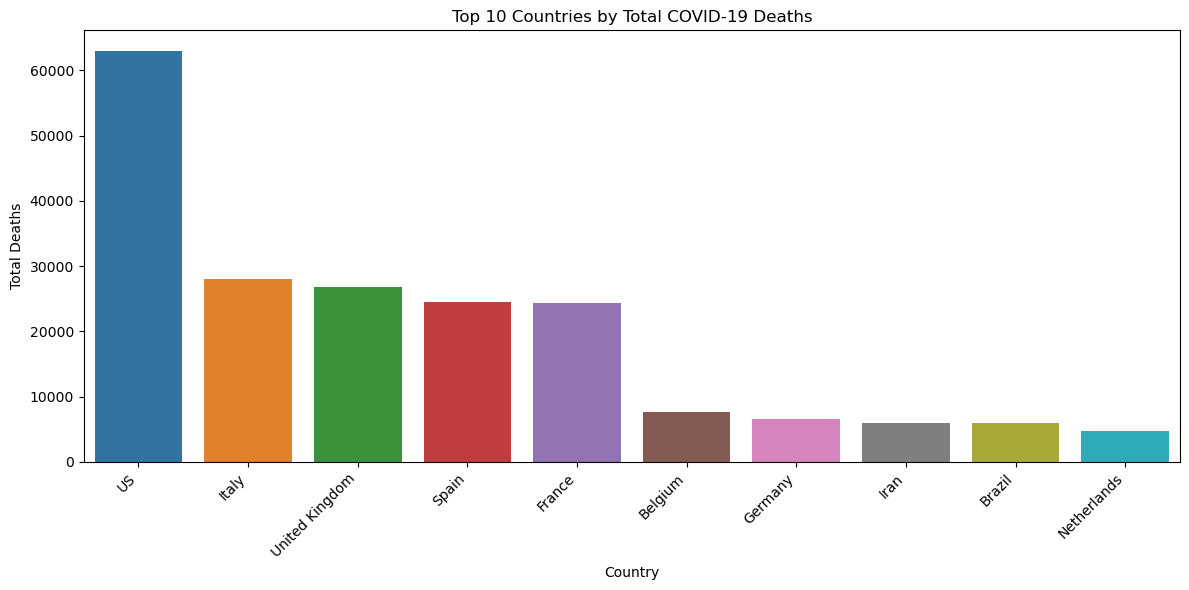

In [10]:
# Top 10 countries by total deaths
plt.figure(figsize=(12, 6))
top_10_countries = df_grouped.groupby('Country/Region')['Deaths'].max().nlargest(10)
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries by Total COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

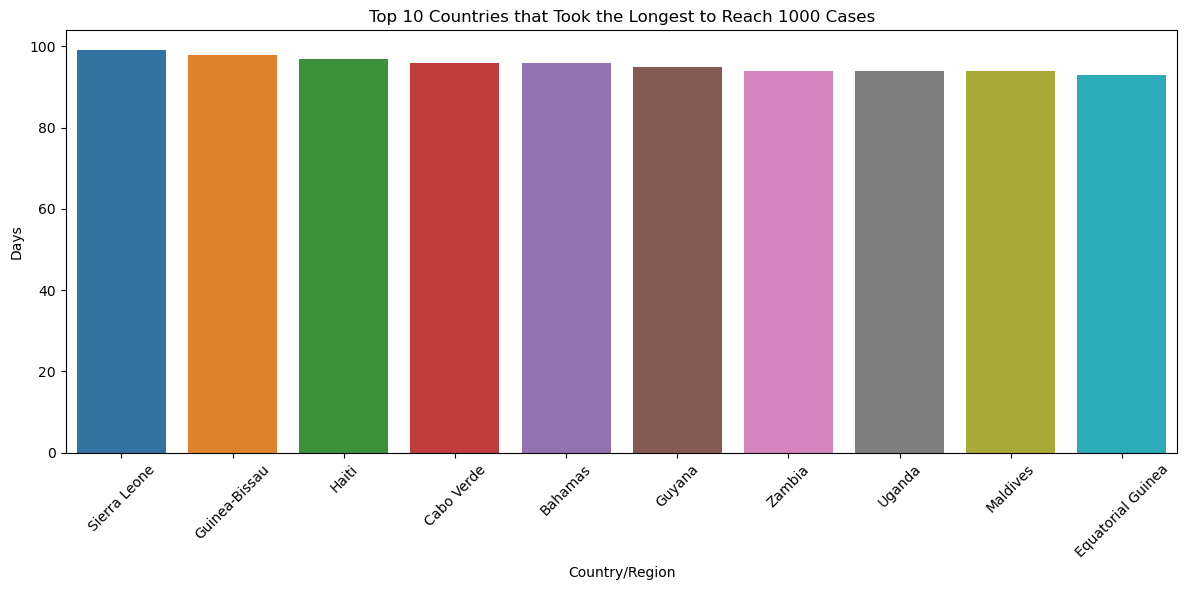

In [11]:
df_melted['Cumulative_Cases'] = df_melted.groupby('Country/Region')['Confirmed'].cumsum()
days_to_1000 = df_melted[df_melted['Cumulative_Cases'] >= 1000].groupby('Country/Region')['Date'].min() - df_melted.groupby('Country/Region')['Date'].min()
top_slowest = days_to_1000.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_slowest.index, y=top_slowest.dt.days)
plt.title('Top 10 Countries that Took the Longest to Reach 1000 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

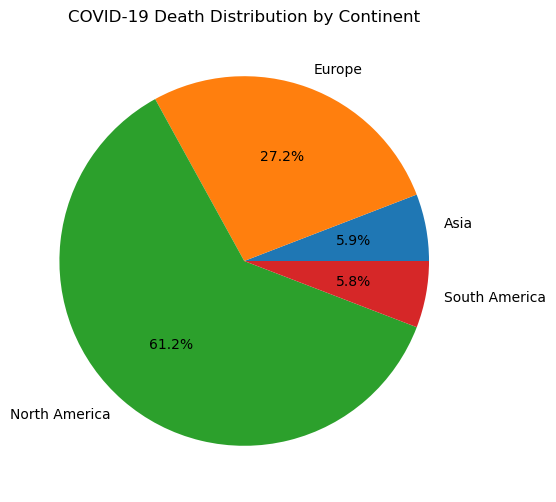

In [12]:
# 4. Death distribution by continent
df['Continent'] = df['Country/Region'].map({
    'US': 'North America', 'Brazil': 'South America', 'United Kingdom': 'Europe',
    'Italy': 'Europe', 'France': 'Europe', 'Spain': 'Europe', 'India': 'Asia',
    'Mexico': 'North America', 'Germany': 'Europe', 'Iran': 'Asia'
})
continent_deaths = df.groupby('Continent')['Deaths'].max().dropna()
plt.figure(figsize=(10, 6))
plt.pie(continent_deaths, labels=continent_deaths.index, autopct='%1.1f%%')
plt.title('COVID-19 Death Distribution by Continent')
plt.show()

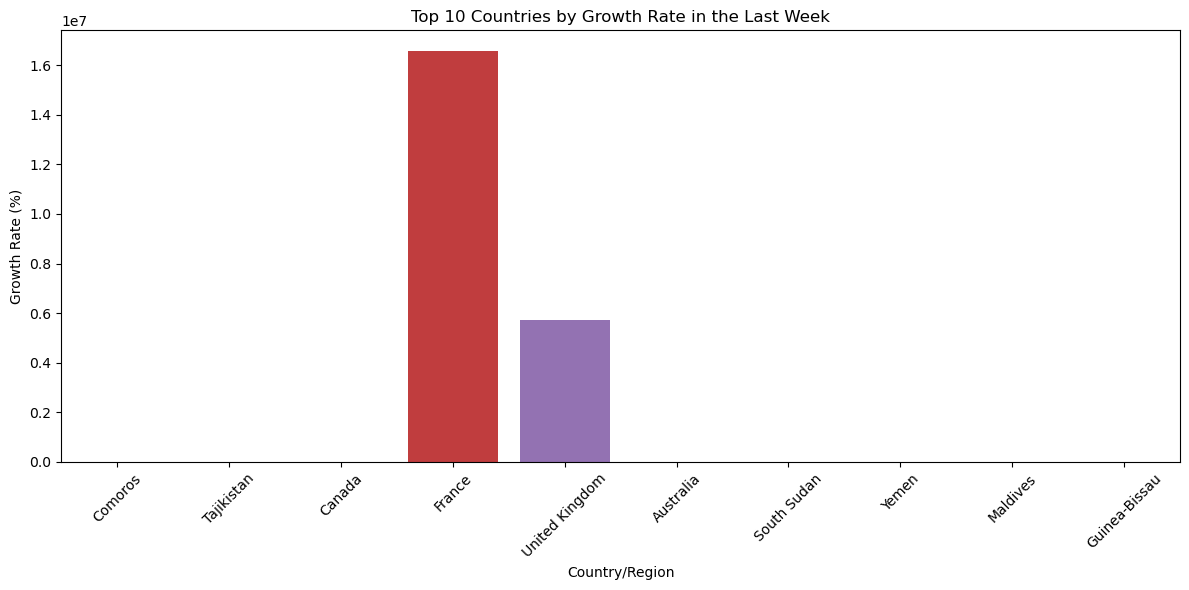

In [13]:
from datetime import timedelta
last_week = df_melted[df_melted['Date'] >= df_melted['Date'].max() - timedelta(days=7)]
growth_rate = last_week.groupby('Country/Region').agg({
    'Confirmed': ['first', 'last']
})
growth_rate.columns = ['First', 'Last']
growth_rate['Growth_Rate'] = (growth_rate['Last'] - growth_rate['First']) / growth_rate['First'] * 100
top_growth = growth_rate.sort_values('Growth_Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_growth.index, y=top_growth['Growth_Rate'])
plt.title('Top 10 Countries by Growth Rate in the Last Week')
plt.xlabel('Country/Region')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()